<a href="https://colab.research.google.com/github/Phattharyu/CPE_232-Final_project-GoldPrediction-/blob/main/Gold_Proj_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library & Data from Google Drive using gdown**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf
import pandas_datareader as pdr

from datetime import datetime

!gdown 14iSHWNraKglyrcLFQe5-GprkjkO6xaCK

df = pd.read_csv('Merged_Gold_dataset.csv')
df

Downloading...
From: https://drive.google.com/uc?id=14iSHWNraKglyrcLFQe5-GprkjkO6xaCK
To: /content/Merged_Gold_dataset.csv
100% 1.02M/1.02M [00:00<00:00, 39.9MB/s]


,Unnamed: 0,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
0,0,2005-03-28,425.899994,425.899994,425.899994,425.899994,0,33.386323,434.190002,435.730000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
1,1,2005-03-29,426.000000,426.000000,426.000000,426.000000,0,33.629056,432.680002,435.205000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
2,2,2005-03-31,428.700012,428.700012,428.700012,428.700012,3051,39.987248,431.460004,434.995001,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
3,3,2005-04-01,425.899994,428.500000,424.500000,428.299988,552,36.122564,429.680002,434.650002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
4,4,2005-04-04,423.899994,426.299988,422.700012,426.000000,486,33.622901,428.200000,434.350002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,2025-02-21,2937.600098,2940.000000,2917.300049,2938.800049,570,68.447600,2914.120020,2862.110022,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5004,5004,2025-02-24,2947.899902,2957.899902,2933.100098,2933.100098,415,69.639013,2922.180005,2870.640015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5005,5005,2025-02-25,2904.500000,2943.199951,2890.000000,2938.699951,1854,59.452120,2921.200000,2878.990015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5006,5006,2025-02-26,2916.800049,2917.000000,2913.000000,2913.500000,2050,61.185088,2921.630005,2886.490015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912


In [ ]:
df

,Unnamed: 0,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
0,0,2005-03-28,425.899994,425.899994,425.899994,425.899994,0,33.386323,434.190002,435.730000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
1,1,2005-03-29,426.000000,426.000000,426.000000,426.000000,0,33.629056,432.680002,435.205000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
2,2,2005-03-31,428.700012,428.700012,428.700012,428.700012,3051,39.987248,431.460004,434.995001,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
3,3,2005-04-01,425.899994,428.500000,424.500000,428.299988,552,36.122564,429.680002,434.650002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
4,4,2005-04-04,423.899994,426.299988,422.700012,426.000000,486,33.622901,428.200000,434.350002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,2025-02-21,2937.600098,2940.000000,2917.300049,2938.800049,570,68.447600,2914.120020,2862.110022,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5004,5004,2025-02-24,2947.899902,2957.899902,2933.100098,2933.100098,415,69.639013,2922.180005,2870.640015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5005,5005,2025-02-25,2904.500000,2943.199951,2890.000000,2938.699951,1854,59.452120,2921.200000,2878.990015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5006,5006,2025-02-26,2916.800049,2917.000000,2913.000000,2913.500000,2050,61.185088,2921.630005,2886.490015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Date,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
0,2005-03-28,425.899994,425.899994,425.899994,425.899994,0,33.386323,434.190002,435.730000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
1,2005-03-29,426.000000,426.000000,426.000000,426.000000,0,33.629056,432.680002,435.205000,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
2,2005-03-31,428.700012,428.700012,428.700012,428.700012,3051,39.987248,431.460004,434.995001,193.100,65.9,12767.286,54.055710,153.700,5.2,100.34460,100.4980
3,2005-04-01,425.899994,428.500000,424.500000,428.299988,552,36.122564,429.680002,434.650002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
4,2005-04-04,423.899994,426.299988,422.700012,426.000000,486,33.622901,428.200000,434.350002,193.700,66.1,12922.656,68.682759,155.000,5.2,100.29310,100.5254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2025-02-21,2937.600098,2940.000000,2917.300049,2938.800049,570,68.447600,2914.120020,2862.110022,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5004,2025-02-24,2947.899902,2957.899902,2933.100098,2933.100098,415,69.639013,2922.180005,2870.640015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5005,2025-02-25,2904.500000,2943.199951,2890.000000,2938.699951,1854,59.452120,2921.200000,2878.990015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912
5006,2025-02-26,2916.800049,2917.000000,2913.000000,2913.500000,2050,61.185088,2921.630005,2886.490015,319.775,62.4,29723.864,429.830565,259.805,4.1,99.85411,100.4912


In [ ]:
df.corr(numeric_only=True)

,Close,High,Low,Open,Volume,RSI,SMA10,SMA20,CPIAUCSL,CIVPART,GDP,GEPUCURRENT,PPIACO,UNRATE,CLI,GDP_Reference
Close,1.000000,0.999804,0.999848,0.999647,0.011110,0.056102,0.998708,0.997313,0.872774,-0.752249,0.833702,0.740655,0.841121,-0.059680,-0.149081,-0.251865
High,0.999804,1.000000,0.999690,0.999834,0.010136,0.052526,0.998855,0.997459,0.871735,-0.751766,0.832376,0.741015,0.840397,-0.057307,-0.151421,-0.253908
Low,0.999848,0.999690,1.000000,0.999767,0.012452,0.052978,0.998783,0.997415,0.874127,-0.753077,0.835329,0.740459,0.842230,-0.062724,-0.146818,-0.249747
Open,0.999647,0.999834,0.999767,1.000000,0.011446,0.049126,0.998966,0.997592,0.872586,-0.752268,0.833431,0.740425,0.841154,-0.059515,-0.149046,-0.251921
Volume,0.011110,0.010136,0.012452,0.011446,1.000000,-0.012192,0.011804,0.011963,0.003536,-0.016081,0.002869,0.019215,0.001425,0.007951,-0.006660,-0.009115
RSI,0.056102,0.052526,0.052978,0.049126,-0.012192,1.000000,0.018972,-0.007342,-0.014676,0.121702,-0.006387,0.028437,-0.056291,0.042505,-0.051882,-0.003192
SMA10,0.998708,0.998855,0.998783,0.998966,0.011804,0.018972,1.000000,0.999273,0.873151,-0.755273,0.833788,0.740134,0.842896,-0.060396,-0.146759,-0.251503
SMA20,0.997313,0.997459,0.997415,0.997592,0.011963,-0.007342,0.999273,1.000000,0.873465,-0.758442,0.833877,0.739234,0.844762,-0.061777,-0.143694,-0.250819
CPIAUCSL,0.872774,0.871735,0.874127,0.872586,0.003536,-0.014676,0.873151,0.873465,1.000000,-0.761020,0.992917,0.764638,0.923692,-0.424960,-0.104947,-0.112536
CIVPART,-0.752249,-0.751766,-0.753077,-0.752268,-0.016081,0.121702,-0.755273,-0.758442,-0.761020,1.000000,-0.748032,-0.704932,-0.647723,0.151635,0.115453,0.367344


from matplotlib import pyplot as plt
_df_0['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Close', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Open', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#CPIAUCSL	CIVPART	GDP	GEPUCURRENT	PPIACO

# **MinMaxScaler**

# **Data Processing**

In [ ]:
train_size = round(len(df)*0.75)
val_size = round(len(df)*0.9) - round(len(df)*0.75)
test_size = len(df) - train_size - val_size
print('Train:',train_size,'Valid:',val_size,'Test:',test_size)

Train: 3756 Valid: 751 Test: 501


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
train_data = df.Close[:train_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

val_data = df.Close[train_size:train_size+val_size]
val_data = scaler.transform(val_data.values.reshape(-1,1))

test_data = df.Close[train_size+val_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
scaler_sma10 = MinMaxScaler()
scaler_sma10.fit(df.Close.values.reshape(-1,1))
train_data_sma10 = df['SMA10'][:train_size]
train_data_sma10 = scaler_sma10.transform(train_data_sma10.values.reshape(-1,1))

val_data_sma10 = df['SMA10'][train_size:train_size+val_size]
val_data_sma10 = scaler_sma10.transform(val_data_sma10.values.reshape(-1,1))

test_data_sma10 = df['SMA10'][train_size+val_size:]
test_data_sma10 = scaler_sma10.transform(test_data_sma10.values.reshape(-1,1))

In [ ]:
scaler_sma20 = MinMaxScaler()
scaler_sma20.fit(df.SMA20.values.reshape(-1,1))
train_data_sma20 = df['SMA20'][:train_size]
train_data_sma20 = scaler_sma20.transform(train_data_sma20.values.reshape(-1,1))

val_data_sma20 = df['SMA10'][train_size:train_size+val_size]
val_data_sma20 = scaler_sma20.transform(val_data_sma20.values.reshape(-1,1))

test_data_sma20 = df['SMA20'][train_size+val_size:]
test_data_sma20 = scaler_sma20.transform(test_data_sma20.values.reshape(-1,1))

In [ ]:
train_data_rsi = df['RSI'][:train_size]
val_data_rsi = df['RSI'][train_size:train_size+val_size]
test_data_rsi = df['RSI'][train_size+val_size:]

In [ ]:
window=5
x_train=[]
y_train = []
for i in range(train_size-window) :
  temp = train_data[i:i+window]
  temp = np.append(temp, train_data_sma10[i:i+window])
  x_train.append(temp)
  y_train.append(train_data[i+window])

In [ ]:
x_val=[]
y_val = []
for i in range(window) :
  temp = train_data[i+3751-window:i+3751]
  temp = np.append(temp, train_data_sma10[i+3751-window:i+3751])
  x_val.append(temp)
  y_val.append(train_data[i+3751])
for i in range(val_size-window) :
  temp = val_data[i:i+window]
  temp = np.append(temp, val_data_sma10[i:i+window])
  x_val.append(temp)
  y_val.append(val_data[i+window])

In [ ]:
x_test=[]
y_test = []
for i in range(window) :
  temp = val_data[i-window-window+len(x_val):i+len(x_val)-window]
  temp = np.append(temp, val_data_sma10[i+len(x_val)-window-window:i+len(x_val)-window])
  x_test.append(temp)
  y_test.append(val_data[i+len(x_val)-window-window])
for i in range(test_size-window) :
  temp = test_data[i:i+window]
  temp = np.append(temp, test_data_sma10[i:i+window])
  x_test.append(temp)
  y_test.append(test_data[i+window])

In [ ]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test  = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((3751, 10, 1), (3751, 1), (751, 10, 1), (751, 1), (501, 10, 1), (501, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((x_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,817 (18.82 KB)

 Trainable params: 4,817 (18.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp = ModelCheckpoint('model/cnn.keras',save_best_only = True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate = 0.0001),metrics = [RootMeanSquaredError()])

In [ ]:
%%time
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs= 20,callbacks=[cp])

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0193 - root_mean_squared_error: 0.1296 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0437
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5579e-04 - root_mean_squared_error: 0.0160 - val_loss: 9.8175e-04 - val_root_mean_squared_error: 0.0313
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6429e-04 - root_mean_squared_error: 0.0128 - val_loss: 5.4897e-04 - val_root_mean_squared_error: 0.0234
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2842e-04 - root_mean_squared_error: 0.0113 - val_loss: 3.9087e-04 - val_root_mean_squared_error: 0.0198
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4186e-04 - root_mean_squared_error: 0.0119 - val_loss: 3.6095e-04 - val_root_mean_squared_error: 0.0190
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2223e-04 - root_mean_squared_error: 0.0111 - val_loss: 3.3024e-04 - val_root_mean_squared_error: 0.0182
Epoch 7/20
1

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model/cnn.keras')

# Evaluate the model
result = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8175e-04 - root_mean_squared_error: 0.0134  


In [ ]:
# Make predictions
%%time
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
CPU times: user 253 ms, sys: 9.02 ms, total: 262 ms
Wall time: 259 ms


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result[0])
print("Test RMSE:", result[1])
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.0002210229285992682
Test RMSE: 0.014866840094327927
Test MAPE: 0.016061953316298668
Test Accuracy: 0.9839380466837013


In [ ]:
y_val_pred = model.predict(x_val)
y_val_true = scaler.inverse_transform(y_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


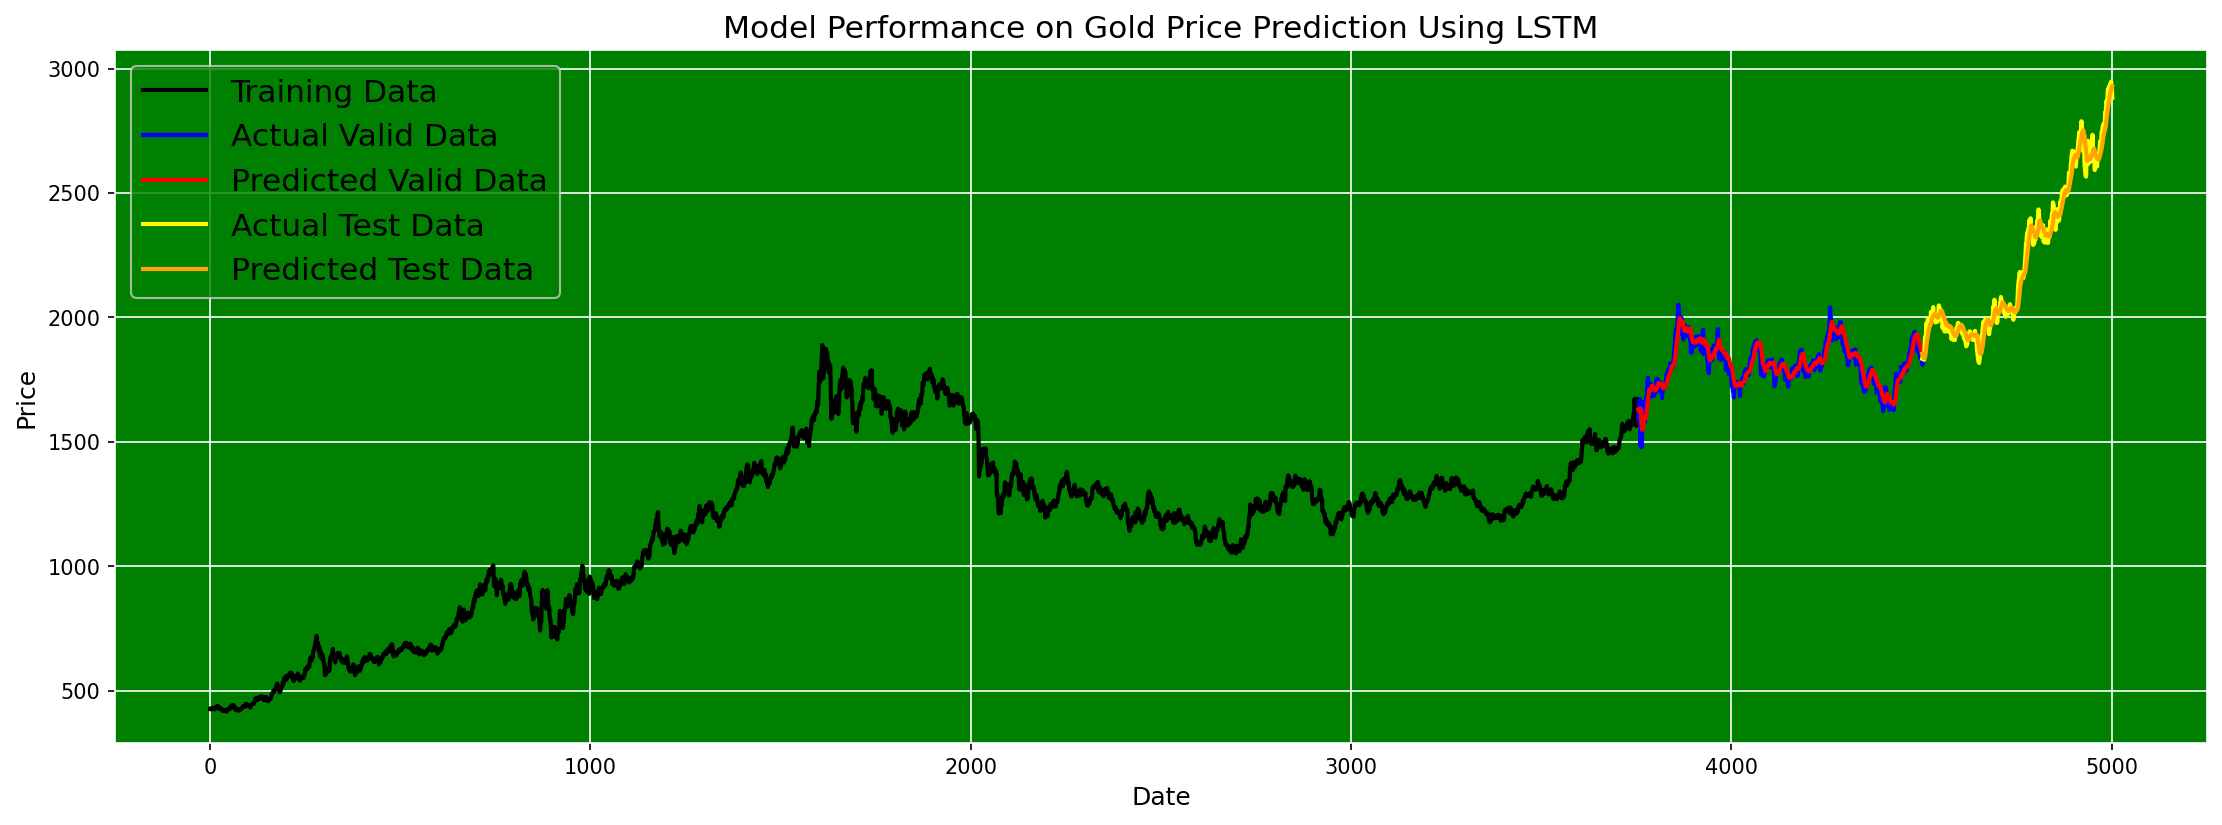

In [ ]:
plt.figure(figsize=(18, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'green'
plt.rc('axes',edgecolor='white')
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df.index[train_size:train_size+val_size], y_val_true, color='blue', lw=2) # Valid True
plt.plot(df.index[train_size:train_size+val_size], y_val_pred, color='red', lw=2) # Valid Pred
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_true, color='yellow', lw=2) # Test True
plt.plot(df.index[train_size+val_size-window:train_size+val_size+test_size-window], y_test_pred, color='orange', lw=2)# Test Pred
plt.title('Model Performance on Gold Price Prediction Using LSTM', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Valid Data', 'Predicted Valid Data','Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9854113116400806

PRICE + Economy Index

In [38]:
features = ['Close', 'CPIAUCSL', 'GDP', 'GEPUCURRENT', 'PPIACO', 'UNRATE', 'CLI']
df = df[features]


In [39]:
scalers = {feature: MinMaxScaler() for feature in features}
for feature in features:
    df[feature] = scalers[feature].fit_transform(df[feature].values.reshape(-1, 1))


In [40]:
train_size = round(len(df) * 0.75)
val_size = round(len(df) * 0.9) - train_size
test_size = len(df) - train_size - val_size

df_train = df[:train_size]
df_val = df[train_size:train_size + val_size]
df_test = df[train_size + val_size:]

In [41]:
def create_sequences(data, window=5):
    x, y = [], []
    for i in range(len(data) - window):
        x.append(data[i:i + window])
        y.append(data[i + window][0])  # 'Close' is the first column
    return np.array(x), np.array(y).reshape(-1, 1)

window = 5
x_train, y_train = create_sequences(df_train.values, window)
x_val, y_val = create_sequences(df_val.values, window)
x_test, y_test = create_sequences(df_test.values, window)

In [42]:
# Model definition
model = Sequential()
model.add(InputLayer((x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 4, 64)          │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,857 (69.75 KB)

 Trainable params: 17,857 (69.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0465 - root_mean_squared_error: 0.2025 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1025
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2145e-04 - root_mean_squared_error: 0.0228 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2385e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3329e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0672
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8767e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━

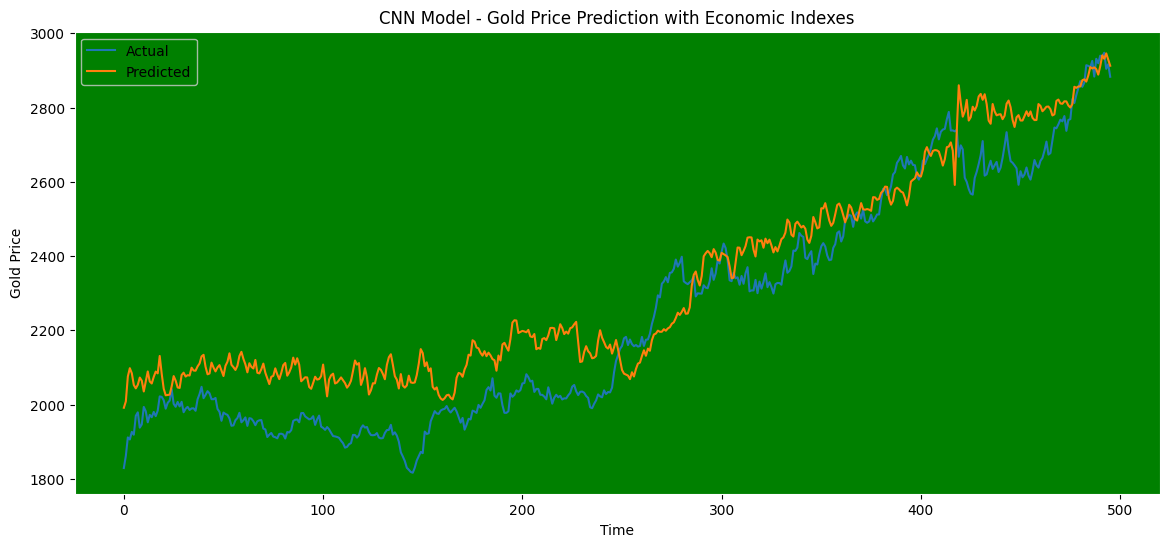

In [43]:
# Model training
cp = ModelCheckpoint('model/cnn_with_index.keras', save_best_only=True)
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, callbacks=[cp])

# Load best model and evaluate
model = load_model('model/cnn_with_index.keras')
result = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

# Inverse transform
y_test_inv = scalers['Close'].inverse_transform(y_test)
y_pred_inv = scalers['Close'].inverse_transform(y_pred)

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('CNN Model - Gold Price Prediction with Economic Indexes')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()


In [44]:
# Print metrics
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
accuracy = 1 - mape
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test MAPE: {mape:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"R^2 Score: {r2:.4f}")

Test MAPE: 0.0498
Accuracy: 0.9502
R^2 Score: 0.8484


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# Load data
df = pd.read_csv("Merged_Gold_dataset.csv")

# Define cases
cases = {
    "case1": ['Close', 'High', 'PPIACO', 'GDP', 'CPIAUCSL'],
    "case2": ['Close', 'Open', 'PPIACO'],
    "case3": ['Close', 'CIVPART'],
    "case4": ['Volume', 'PPIACO', 'GDP', 'CPIAUCSL'],
    "case5": ['Volume', 'CPIAUCSL', 'GDP', 'PPIACO', 'UNRATE'],
    "case6": ['Volume', 'CIVPART'],
    "case7": ['High', 'Low', 'Close', 'Open', 'CIVPART'],
    "case8": ['Close', 'Open', 'CIVPART'],
    "case9": ['High', 'Low', 'CIVPART'],
    "case10": ['Close', 'High', 'Low', 'Open', 'CPIAUCSL', 'GDP', 'PPIACO', 'CLI', 'GDP_Reference'],
    "case11": ['Close', 'High', 'Low', 'Open', 'Volume', 'CPIAUCSL', 'GDP', 'PPIACO', 'CLI', 'GDP_Reference', 'CIVPART']
}

def prepare_data(features, window=5):
    data = df[features]

    scaler_x = MinMaxScaler()
    data_scaled = scaler_x.fit_transform(data)

    train_size = round(len(data)*0.75)
    val_size = round(len(data)*0.9) - train_size
    test_size = len(data) - train_size - val_size

    train = data_scaled[:train_size]
    val = data_scaled[train_size:train_size+val_size]
    test = data_scaled[train_size+val_size:]

    x_train, y_train = [], []
    x_val, y_val = [], []
    x_test, y_test = [], []

    for i in range(len(train)-window):
        x_train.append(train[i:i+window])
        y_train.append(train[i+window][0])  # Predicting first feature (e.g., Close or Volume)

    for i in range(len(val)-window):
        x_val.append(val[i:i+window])
        y_val.append(val[i+window][0])

    for i in range(len(test)-window):
        x_test.append(test[i:i+window])
        y_test.append(test[i+window][0])

    return (
        np.array(x_train), np.array(y_train),
        np.array(x_val), np.array(y_val),
        np.array(x_test), np.array(y_test),
        scaler_x
    )

def train_case(case_name, features):
    print(f"Training {case_name} with features: {features}")
    x_train, y_train, x_val, y_val, x_test, y_test, scaler = prepare_data(features)

    model = Sequential([
        InputLayer((x_train.shape[1], x_train.shape[2])),
        Conv1D(64, kernel_size=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=0.0001),
        metrics=['RootMeanSquaredError']
    )

    cp = ModelCheckpoint(f'model/{case_name}.keras', save_best_only=True)
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, callbacks=[cp], verbose=0)

    model.load_weights(f'model/{case_name}.keras')
    result = model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test, verbose=0)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 1 - mape
    r2 = r2_score(y_test, y_pred)

    print(f"{case_name} Test Loss: {result[0]:.4f}")
    print(f"{case_name} RMSE: {result[1]:.4f}")
    print(f"{case_name} MAPE: {mape:.4f}")
    print(f"{case_name} Accuracy: {accuracy:.4f}")
    print(f"{case_name} R2 Score: {r2:.4f}")

for case, features in cases.items():
    train_case(case, features)


Training case1 with features: ['Close', 'High', 'PPIACO', 'GDP', 'CPIAUCSL']
case1 Test Loss: 0.0001
case1 RMSE: 0.0107
case1 MAPE: 0.0114
case1 Accuracy: 0.9886
case1 R2 Score: 0.9924
Training case2 with features: ['Close', 'Open', 'PPIACO']
case2 Test Loss: 0.2916
case2 RMSE: 0.5400
case2 MAPE: 0.7207
case2 Accuracy: 0.2793
case2 R2 Score: -18.3854
Training case3 with features: ['Close', 'CIVPART']
case3 Test Loss: 0.0007
case3 RMSE: 0.0268
case3 MAPE: 0.0291
case3 Accuracy: 0.9709
case3 R2 Score: 0.9521
Training case4 with features: ['Volume', 'PPIACO', 'GDP', 'CPIAUCSL']
case4 Test Loss: 0.0033
case4 RMSE: 0.0573
case4 MAPE: 129027995732.1881
case4 Accuracy: -129027995731.1881
case4 R2 Score: 0.0190
Training case5 with features: ['Volume', 'CPIAUCSL', 'GDP', 'PPIACO', 'UNRATE']
case5 Test Loss: 0.0034
case5 RMSE: 0.0580
case5 MAPE: 135978337999.0186
case5 Accuracy: -135978337998.0186
case5 R2 Score: -0.0050
Training case6 with features: ['Volume', 'CIVPART']
case6 Test Loss: 0.0033

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def train_model(df, feature_cols, label_col='Close', window=5, model_path='model/cnn.keras'):
    # Split sizes
    train_size = round(len(df) * 0.75)
    val_size = round(len(df) * 0.9) - train_size
    test_size = len(df) - train_size - val_size

    # Scale all selected features
    scalers = {}
    for col in feature_cols + [label_col]:
        scaler = MinMaxScaler()
        scaler.fit(df[[col]])
        scalers[col] = scaler

    scaled_data = {}
    for col in feature_cols + [label_col]:
        scaled_data[col] = scalers[col].transform(df[[col]])

    # Prepare data splits
    def split_scaled_data(col):
        data = scaled_data[col]
        return (
            data[:train_size],
            data[train_size:train_size+val_size],
            data[train_size+val_size:]
        )

    train_dict, val_dict, test_dict = {}, {}, {}
    for col in feature_cols:
        train_dict[col], val_dict[col], test_dict[col] = split_scaled_data(col)

    train_label, val_label, test_label = split_scaled_data(label_col)

    # Combine features into windows
    def create_windows(data_dict, label_data):
        x, y = [], []
        keys = list(data_dict.keys())
        size = len(next(iter(data_dict.values())))
        for i in range(size - window):
            temp = []
            for key in keys:
                temp.extend(data_dict[key][i:i+window].flatten())
            x.append(temp)
            y.append(label_data[i + window])
        return np.array(x), np.array(y)

    x_train, y_train = create_windows(train_dict, train_label)
    x_val, y_val = create_windows(val_dict, val_label)
    x_test, y_test = create_windows(test_dict, test_label)

    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

    # Model
    model = Sequential([
        InputLayer(input_shape=(x_train.shape[1], 1)),
        Conv1D(64, kernel_size=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=0.0001),
        metrics=[RootMeanSquaredError()]
    )

    cp = ModelCheckpoint(model_path, save_best_only=True)
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[cp], verbose=0)

    model.load_weights(model_path)
    y_pred = model.predict(x_test)

    # Evaluation
    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 1 - mape
    rmse = np.sqrt(((y_test - y_pred)**2).mean())
    r2 = r2_score(y_test, y_pred)

    print(f"MAPE: {mape:.4f}, Accuracy: {accuracy:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")
    return model, y_test, y_pred, scalers[label_col], test_label

def plot_results(y_test_scaled, y_pred_scaled, scaler, title='Model Prediction vs Actual'):
    y_test = scaler.inverse_transform(y_test_scaled)
    y_pred = scaler.inverse_transform(y_pred_scaled)

    plt.figure(figsize=(16, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()





In [54]:
print(df.columns)


Index(['Unnamed: 0', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI',
       'SMA10', 'SMA20', 'CPIAUCSL', 'CIVPART', 'GDP', 'GEPUCURRENT', 'PPIACO',
       'UNRATE', 'CLI', 'GDP_Reference'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAPE: 0.0091, Accuracy: 0.9909, RMSE: 0.0086, R^2: 0.9951


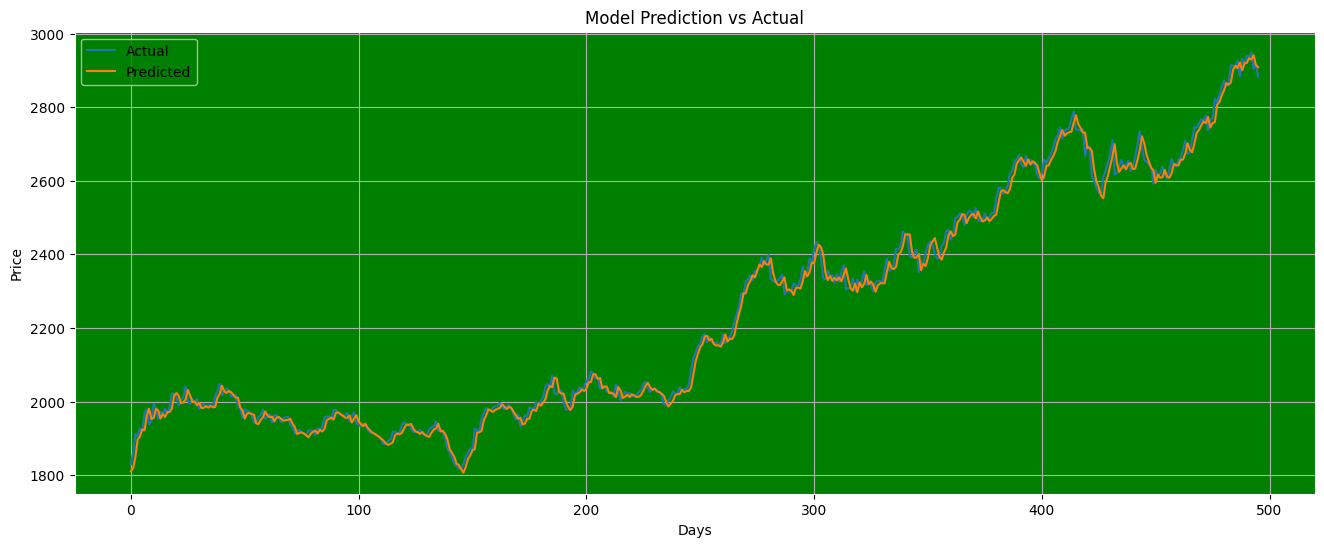

In [56]:
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Close', 'High', 'PPIACO', 'GDP', 'CPIAUCSL'])
plot_results(y_test, y_pred, scaler)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAPE: 0.0136, Accuracy: 0.9864, RMSE: 0.0161, R^2: 0.9828


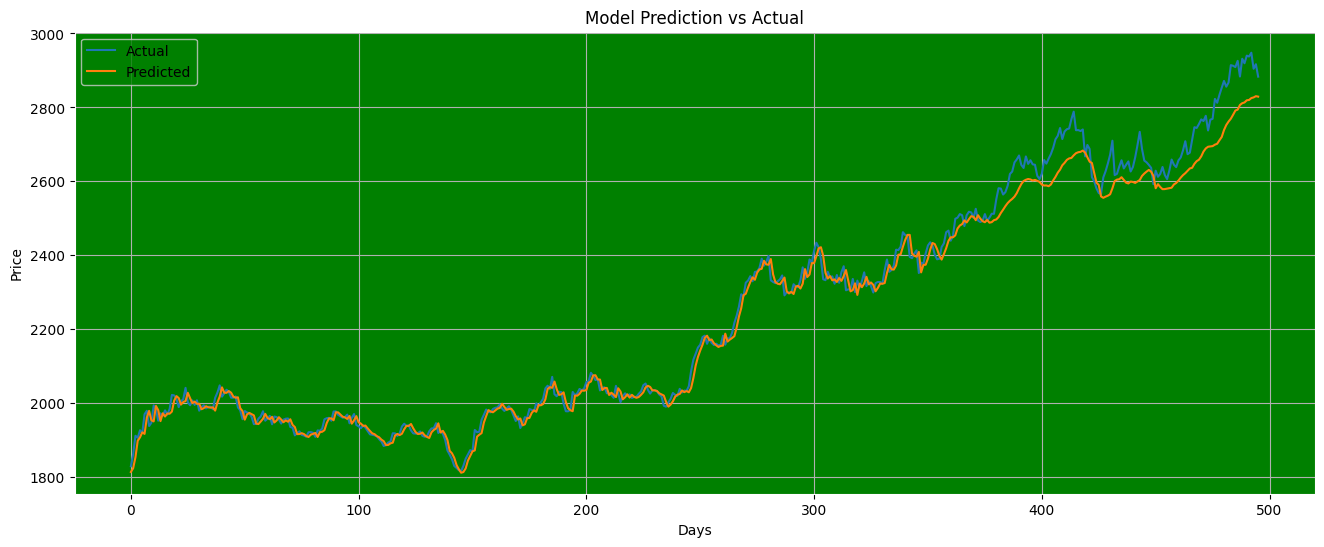

In [57]:
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Close', 'Open', 'PPIACO'])
plot_results(y_test, y_pred, scaler)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAPE: 0.0106, Accuracy: 0.9894, RMSE: 0.0099, R^2: 0.9935


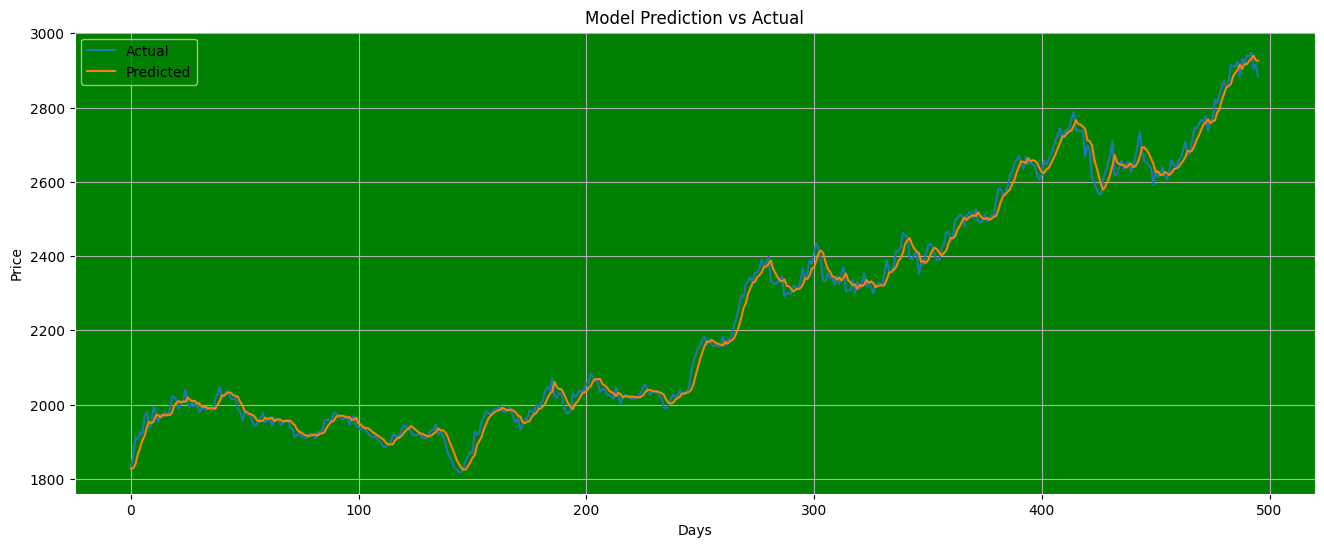

In [58]:
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Close', 'CIVPART'])
plot_results(y_test, y_pred, scaler)
#3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MAPE: 0.1402, Accuracy: 0.8598, RMSE: 0.1119, R^2: 0.1679


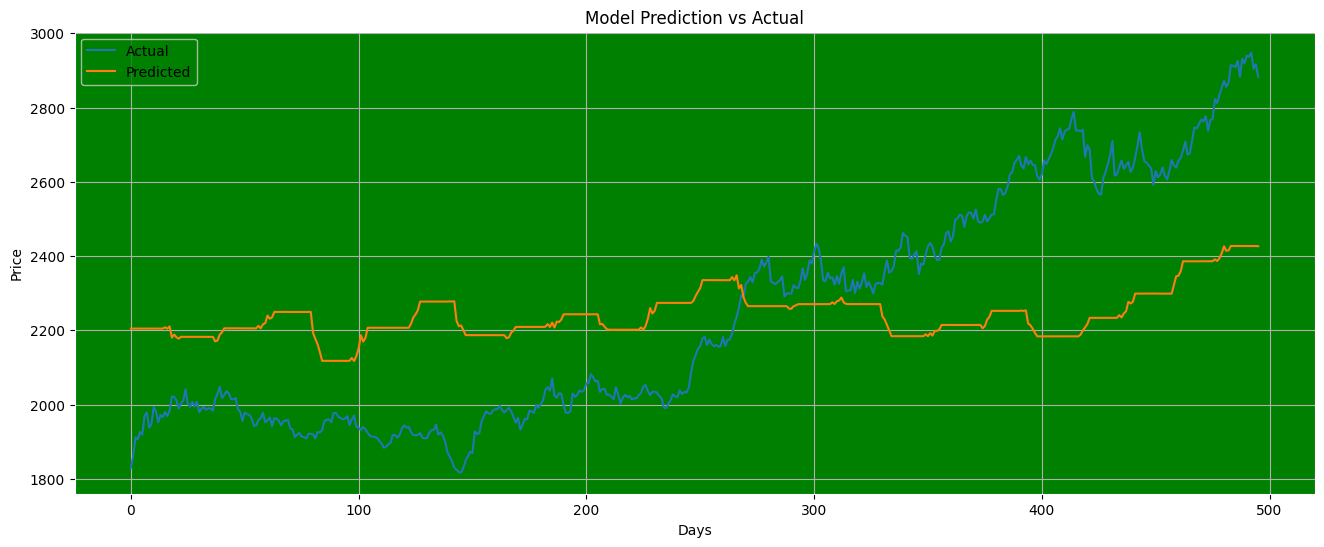

In [59]:
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Volume', 'PPIACO', 'GDP', 'CPIAUCSL'])
plot_results(y_test, y_pred, scaler)
#4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAPE: 0.1034, Accuracy: 0.8966, RMSE: 0.0941, R^2: 0.4115


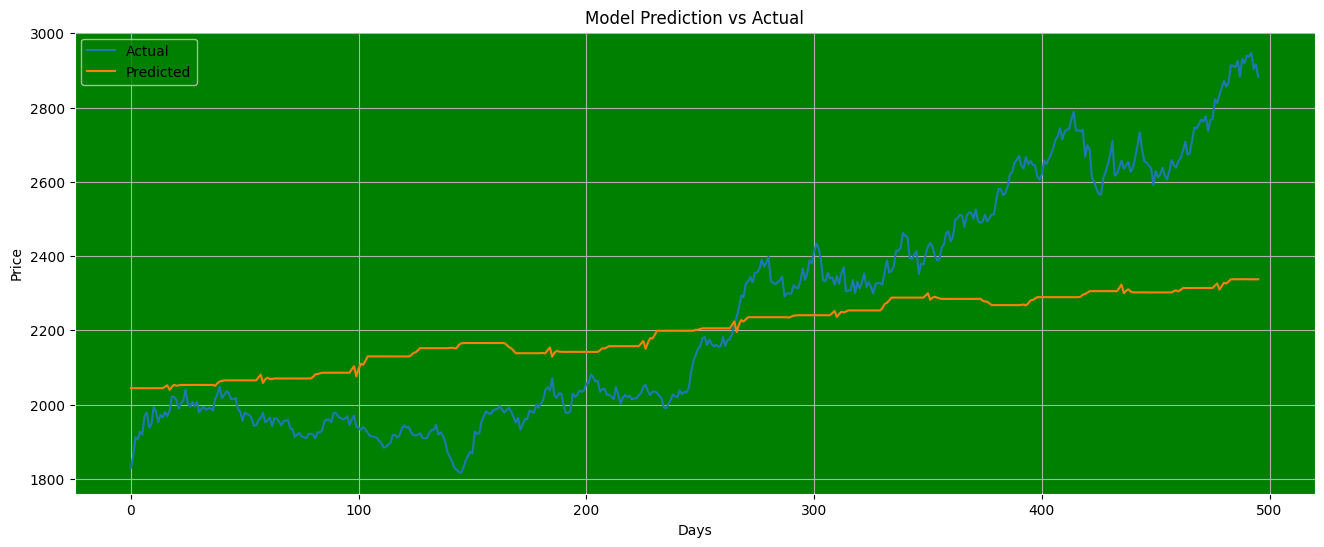

In [60]:
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Volume', 'CPIAUCSL', 'GDP', 'PPIACO', 'UNRATE'])
plot_results(y_test, y_pred, scaler)
#5

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAPE: 0.4235, Accuracy: 0.5765, RMSE: 0.3386, R^2: -6.6209


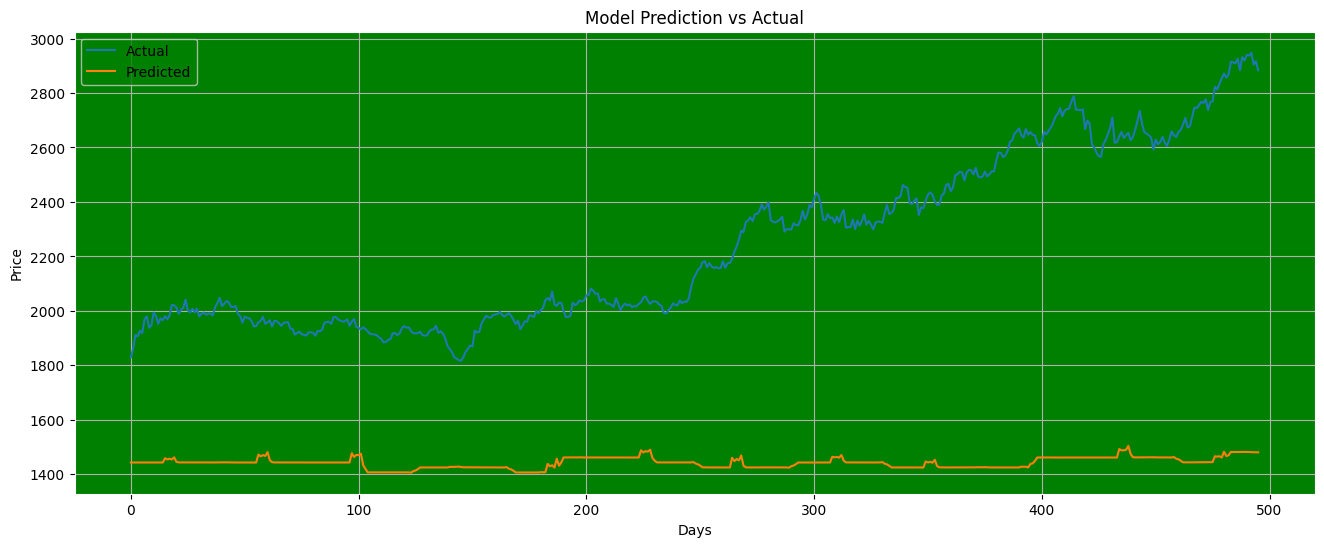

In [62]:
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Volume', 'CIVPART'])
plot_results(y_test, y_pred, scaler)
#6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAPE: 0.0456, Accuracy: 0.9544, RMSE: 0.0415, R^2: 0.8857


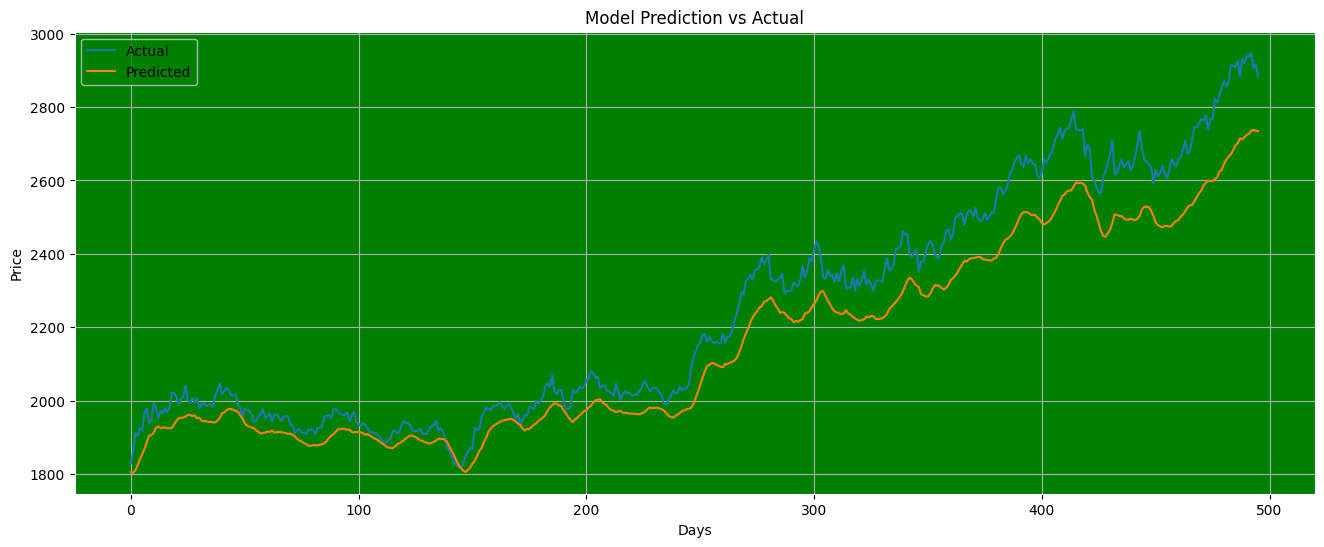

In [63]:
#7
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['High', 'Low', 'Close', 'Open', 'CIVPART'])
plot_results(y_test, y_pred, scaler)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAPE: 0.0317, Accuracy: 0.9683, RMSE: 0.0314, R^2: 0.9344


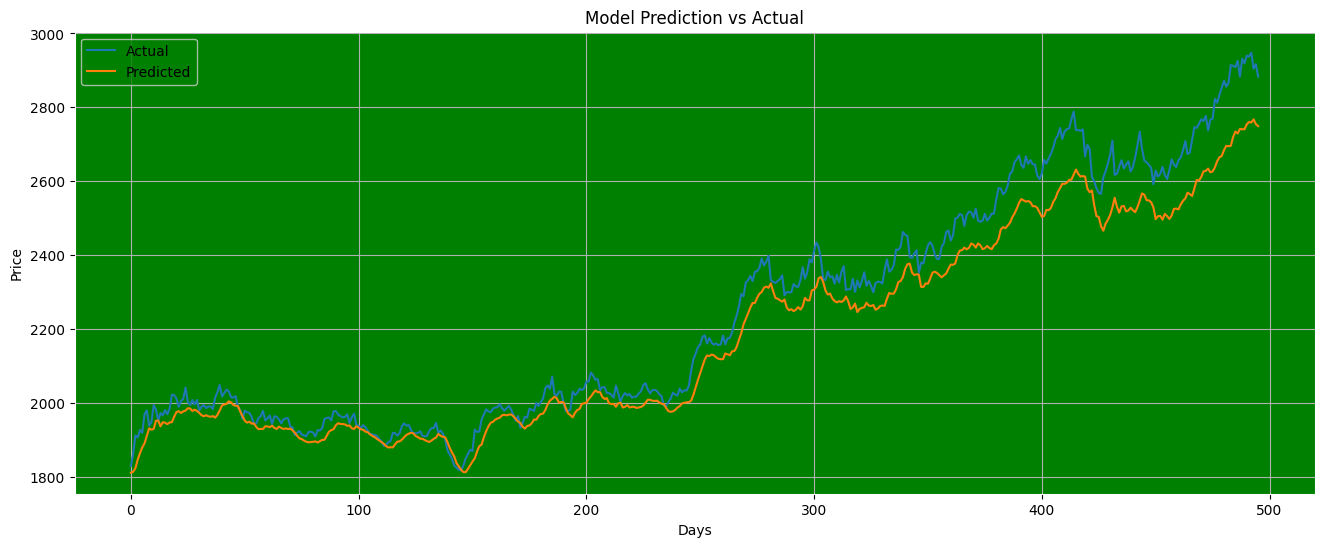

In [64]:
#8
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Close', 'Open', 'CIVPART'])
plot_results(y_test, y_pred, scaler)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAPE: 0.1458, Accuracy: 0.8542, RMSE: 0.1282, R^2: -0.0918


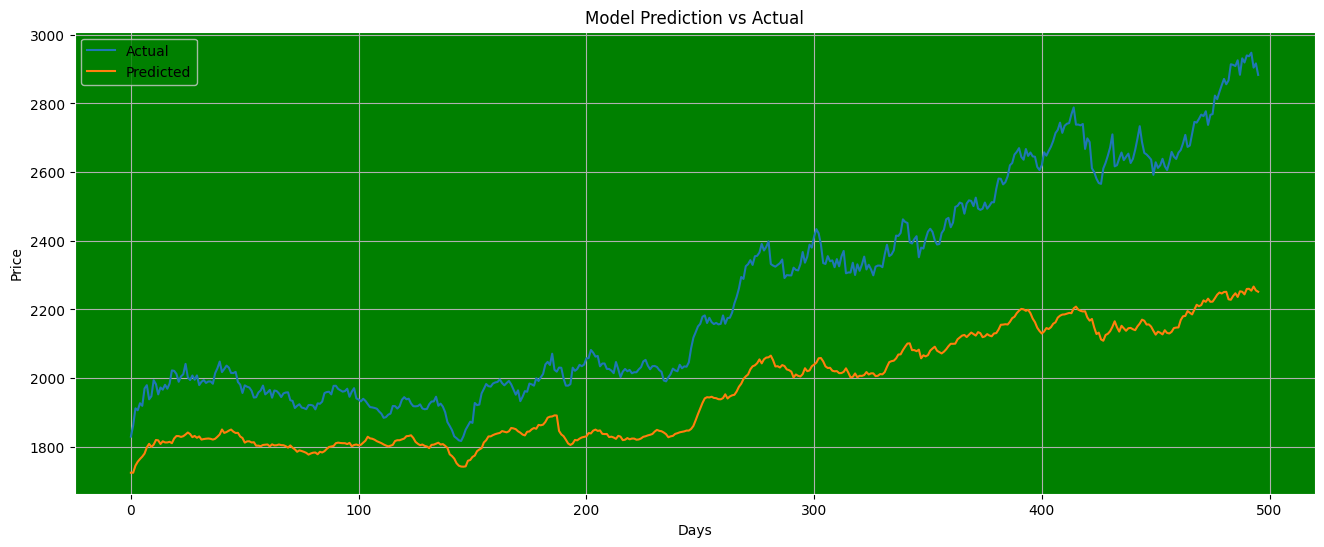

In [66]:
#9
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['High', 'Low', 'CIVPART'])
plot_results(y_test, y_pred, scaler)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAPE: 0.0090, Accuracy: 0.9910, RMSE: 0.0087, R^2: 0.9950


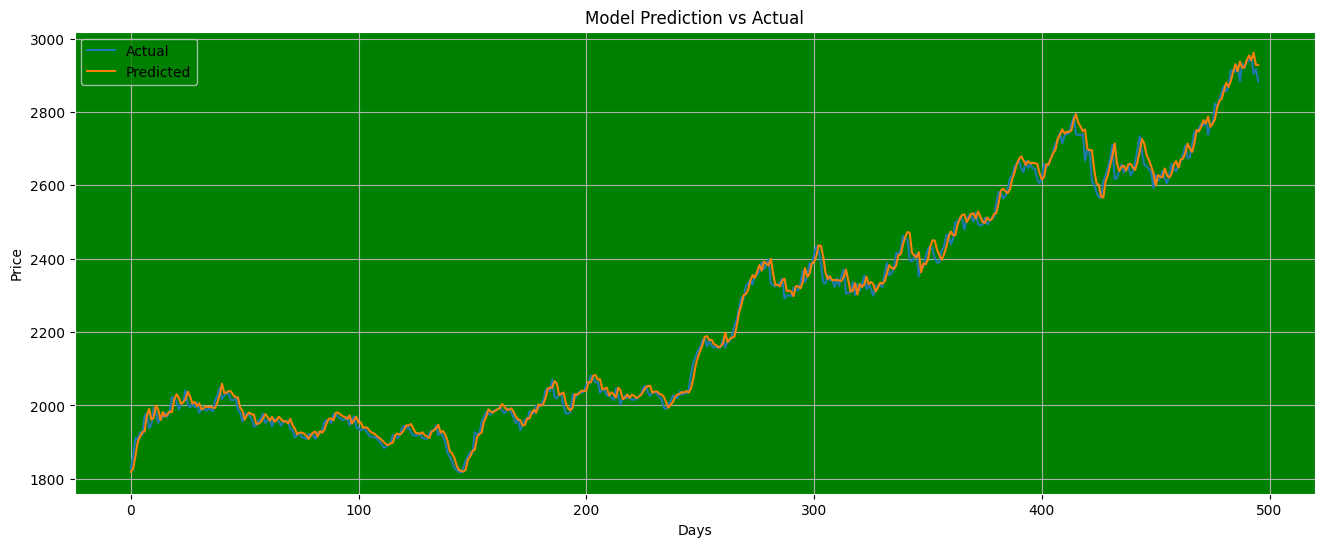

In [67]:
#10
model, y_test, y_pred, scaler, y_test_scaled = train_model(df, ['Close', 'High', 'Low', 'Open', 'CPIAUCSL', 'GDP', 'PPIACO', 'CLI', 'GDP_Reference'])
plot_results(y_test, y_pred, scaler)
